In [ ]:
!pip install google-play-scraper  #for scraping info about apk files from google repository
!pip install androguard   #for analyaing apk
!pip install scikit-plot   #for plotting from sklearn
!pip install pyfiglet   #importing for designing the CLI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.9/943.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.5 MB/s eta 0:00:00
  Created wheel for mutf8: filename=mutf8-1.0.6-cp310-cp310-linux_x86_6

In [ ]:
#imported necessary libraries
from IPython.display import Javascript
def resize_colab_cell():                                                                                                                            #to increase size of colab cell
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)
import warnings #to supress  warnings so that if any uncritical warningss will not show while executing
warnings.filterwarnings("ignore", category=DeprecationWarning)
from google.colab import drive  #mounting google drive for taking dataset and other files from google drive
drive.mount('/content/drive')
from androguard.misc import AnalyzeAPK
import androguard
import pickle
from google_play_scraper import app
import pandas as pd
import numpy as np
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import shap
import scikitplot as skplt
import pickle
import pyfiglet
import sys
from termcolor import colored, cprint
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
import numpy as np
train_acc = []
test_acc = []
train_prec = []
test_prec = []


Mounted at /content/drive


In [ ]:
#Reading data into a variable
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/final project-20230922T140331Z-001/final project/new_permissions.csv") #reading the dataset for training
df.head()

<IPython.core.display.Javascript object>

,android.permission.BIND_WALLPAPER,android.permission.FORCE_BACK,android.permission.READ_CALENDAR,android.permission.BODY_SENSORS,android.permissionREAD_SOCIAL_STREAM,android.permissionREAD_SYNC_STATS,android.permission.INTERNET,android.permission.CHANGE_CONFIGURATION,android.permission.BIND_DREAM_SERVICE,android.permission.HARDWARE_TEST,...,android.permission.READ_SMS,android.permission.BATTERY_STATS,android.permission.GLOBAL_SEARCH,android.permission.BIND_NFC_SERVICE,android.permission.PACKAGE_USAGE_STATS,android.permission.SET_ALWAYS_FINISH,android.permission.ACCESS_DRM,android.permission.BROADCAST_STICKY,android.permission.MOUNT_UNMOUNT_FILESYSTEMS,LABEL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.tail()

<IPython.core.display.Javascript object>

,android.permission.BIND_WALLPAPER,android.permission.FORCE_BACK,android.permission.READ_CALENDAR,android.permission.BODY_SENSORS,android.permissionREAD_SOCIAL_STREAM,android.permissionREAD_SYNC_STATS,android.permission.INTERNET,android.permission.CHANGE_CONFIGURATION,android.permission.BIND_DREAM_SERVICE,android.permission.HARDWARE_TEST,...,android.permission.READ_SMS,android.permission.BATTERY_STATS,android.permission.GLOBAL_SEARCH,android.permission.BIND_NFC_SERVICE,android.permission.PACKAGE_USAGE_STATS,android.permission.SET_ALWAYS_FINISH,android.permission.ACCESS_DRM,android.permission.BROADCAST_STICKY,android.permission.MOUNT_UNMOUNT_FILESYSTEMS,LABEL
20017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
20018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
20019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
20020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
20021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
df=df.dropna()

<IPython.core.display.Javascript object>

In [ ]:
df.tail()

<IPython.core.display.Javascript object>

,android.permission.BIND_WALLPAPER,android.permission.FORCE_BACK,android.permission.READ_CALENDAR,android.permission.BODY_SENSORS,android.permissionREAD_SOCIAL_STREAM,android.permissionREAD_SYNC_STATS,android.permission.INTERNET,android.permission.CHANGE_CONFIGURATION,android.permission.BIND_DREAM_SERVICE,android.permission.HARDWARE_TEST,...,android.permission.READ_SMS,android.permission.BATTERY_STATS,android.permission.GLOBAL_SEARCH,android.permission.BIND_NFC_SERVICE,android.permission.PACKAGE_USAGE_STATS,android.permission.SET_ALWAYS_FINISH,android.permission.ACCESS_DRM,android.permission.BROADCAST_STICKY,android.permission.MOUNT_UNMOUNT_FILESYSTEMS,LABEL
11469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.columns.isnull()

<IPython.core.display.Javascript object>

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
Index: 11474 entries, 0 to 11473
Columns: 168 entries, android.permission.BIND_WALLPAPER to LABEL
dtypes: float64(168)
memory usage: 14.8 MB


In [ ]:
for i in df.columns:           #list all columns and their default values
    print("{} : {}".format(i,list(pd.unique(df[i]))))

<IPython.core.display.Javascript object>

android.permission.BIND_WALLPAPER : [0.0, 1.0]
android.permission.FORCE_BACK : [0.0, 1.0]
android.permission.READ_CALENDAR : [0.0]
android.permission.BODY_SENSORS : [0.0, 1.0]
android.permissionREAD_SOCIAL_STREAM : [0.0]
android.permissionREAD_SYNC_STATS : [0.0, 1.0]
android.permission.INTERNET : [0.0, 1.0]
android.permission.CHANGE_CONFIGURATION : [0.0]
android.permission.BIND_DREAM_SERVICE : [0.0, 1.0]
android.permission.HARDWARE_TEST : [0.0]
com.android.browser.permission.WRITE_HISTORY_BOOKMARKS : [0.0, 1.0]
com.android.browser.permission.WRITE_HISTORY_BOOKMARKS.1 : [0.0, 1.0]
android.permission.BIND_TV_INPUT : [0.0, 1.0]
android.permission.BIND_VPN_SERVICE : [0.0, 1.0]
android.permission.BLUETOOTH_PRIVILEGED : [0.0, 1.0]
android.permission.WRITE_CALL_LOG : [0.0]
android.permission.CHANGE_WIFI_MULTICAST_SITE : [0.0]
android.permission.BIND_INPUT_METHOD : [0.0]
android.permission.SET_TIME_ZONE : [0.0, 1.0]
android.permission.WRITE_SYNC_SETTINGS : [0.0, 1.0]
android.permission.WRITE_G

In [ ]:
target = df.pop("LABEL")

<IPython.core.display.Javascript object>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1],target)

<IPython.core.display.Javascript object>

In [ ]:
x_train.shape

<IPython.core.display.Javascript object>

(8605, 166)

In [ ]:
y_train.shape

<IPython.core.display.Javascript object>

(8605,)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

<IPython.core.display.Javascript object>

((8605, 166), (2869, 166), (8605,), (2869,))

In [ ]:
class ModelTraining:
  def proj_banner(self):  #function for showing banner
    ascii_banner = pyfiglet.figlet_format(" Malware")
    ascii_banner2 = pyfiglet.figlet_format(" Predictor")
    te = "\n © IIITMK, Thiruvananthapuram  © packed by \n\n\n"
    a111 = colored(ascii_banner, 'magenta', attrs=['blink'])
    a122 = colored(ascii_banner2, 'magenta', attrs=['blink'])
    co = colored(te, 'red', attrs=['blink'])
    print(a111)
    print(a122)
    print(co)

  def LogisticRegression_Model(self,x_train,x_test,y_train,y_test):  #function for logistic regression
    from sklearn.linear_model import LogisticRegression
    model1 = LogisticRegression(solver='lbfgs', max_iter=1000)
    model1.fit(x_train, y_train)
    y_pred1 = model1.predict(x_test)
    p_text = "\n\n\n****  Logistic Regression  ****"
    prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
    print(prin_text)

    p_text = "\nTraining :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)

    p_text = "Accuracy score    :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = accuracy_score(y_test, y_pred1)*100
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    train_acc.append(p_ans)

    p_text = "Precision score   :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = precision_score(y_test, y_pred1)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    train_prec.append(p_ans)

    p_text = "ROC AUC score     :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = roc_auc_score(y_test, model1.predict_proba(x_test)[:,1])
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred1)

    p_text = "AUC score         :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = auc(fpr1, tpr1)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    o_banner = "\n**********************************************\n"
    o_banner_text = colored(o_banner, 'white', attrs=['bold','blink'])
    print(o_banner_text)

    y_pred1_train = model1.predict(x_train)

    p_text = "\nTesting :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)

    p_text = "Accuracy score    :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = accuracy_score(y_train, y_pred1_train)*100
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    test_acc.append(p_ans)

    p_text = "Precision score   :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = precision_score(y_train, y_pred1_train)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    test_prec.append(p_ans)

    p_text = "ROC AUC score     :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = roc_auc_score(y_train, model1.predict_proba(x_train)[:,1])
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    fpr_t, tpr_t, thresholds_t = roc_curve(y_train, y_pred1_train)

    p_text = "AUC score         :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = auc(fpr_t, tpr_t)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred1)

    # Print Confusion Matrix
    p_text = "\nConfusion Matrix :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold', 'blink'])
    print(prin_text)

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model1.classes_)
    disp.plot(cmap='Blues', values_format='d')

    # Show the plot
    plt.show()

    # Save the model
    filename = '/content/drive/MyDrive/Colab Notebooks/logistic_regression_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model1, file)

    p_text = "\nROC Curve :\n"  # plotting ROC curve graph
    prin_text = colored(p_text, 'cyan', attrs=['bold', 'blink'])
    print(prin_text)

    # Calculate ROC curve
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train, y_pred1_train)

    # Plot ROC curve
    plt.plot(fpr_t, tpr_t)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Logistic Regression')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.show()

    o_banner = "\n------------END------------\n"
    o_banner_text = colored(o_banner, 'white', attrs=['bold', 'blink'])
    print(o_banner_text)


  def SVM_Model(self,x_train,x_test,y_train,y_test):  #function for SVM
    from sklearn.svm import SVC
    model2 = SVC(probability= True)
    model2.fit(x_train,y_train)
    y_pred2 = model2.predict(x_test)

    p_text = "\n\n\n****  Support Vector Machine  ****"
    prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
    print(prin_text)

    p_text = "\nTraining :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)

    p_text = "Accuracy score    :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = accuracy_score(y_test, y_pred2)*100
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    train_acc.append(p_ans)

    p_text = "Precision score   :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = precision_score(y_test, y_pred2)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    train_prec.append(p_ans)

    p_text = "ROC AUC score     :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = roc_auc_score(y_test, model2.predict_proba(x_test)[:,1])
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2)

    p_text = "AUC score         :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = auc(fpr2, tpr2)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    o_banner = "\n**********************************************\n"
    o_banner_text = colored(o_banner, 'white', attrs=['bold','blink'])
    print(o_banner_text)

    y_pred2_train = model2.predict(x_train)

    p_text = "\nTesting :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)

    p_text = "Accuracy score    :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = accuracy_score(y_train, y_pred2_train)*100
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    test_acc.append(p_ans)

    p_text = "Precision score   :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = precision_score(y_train, y_pred2_train)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    test_prec.append(p_ans)

    p_text = "ROC AUC score     :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = roc_auc_score(y_train, model2.predict_proba(x_train)[:,1])
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    fpr_t2, tpr_t2, thresholds_t2 = roc_curve(y_train, y_pred2_train)

    p_text = "AUC score         :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = auc(fpr_t2, tpr_t2)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred2)

    # Print Confusion Matrix
    p_text = "\nConfusion Matrix :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold', 'blink'])
    print(prin_text)

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model2.classes_)
    disp.plot(cmap='Blues', values_format='d')

    # Show the plot
    plt.show()

    # Save the model
    filename = '/content/drive/MyDrive/Colab Notebooks/svm_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model2, file)

    p_text = "\nROC Curve :\n"  # plotting ROC curve graph
    prin_text = colored(p_text, 'cyan', attrs=['bold', 'blink'])
    print(prin_text)

    # Calculate ROC curve
    fpr_t2, tpr_t2, thresholds_t2 = roc_curve(y_train, y_pred2_train)

    # Plot ROC curve
    plt.plot(fpr_t2, tpr_t2)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Support Vector Machine')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.show()

    o_banner = "\n------------END------------\n"
    o_banner_text = colored(o_banner, 'white', attrs=['bold', 'blink'])
    print(o_banner_text)


  def RandomForest_Classifier(self,x_train,x_test,y_train,y_test):  #function for random forest classifier
    from sklearn.ensemble import RandomForestClassifier
    model3 = RandomForestClassifier()
    model3.fit(x_train,y_train)
    y_pred3 = model3.predict(x_test)

    p_text = "\n\n\n****  Random Forest Classifier  ****\n"
    prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
    print(prin_text)

    p_text = "\nTraining :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)

    p_text = "Accuracy score    :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = accuracy_score(y_test, y_pred3)*100
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    train_acc.append(p_ans)

    p_text = "Precision score   :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = precision_score(y_test, y_pred3)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    train_prec.append(p_ans)

    p_text = "ROC AUC score     :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = roc_auc_score(y_test, model3.predict_proba(x_test)[:,1])
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred3)

    p_text = "AUC score         :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = auc(fpr3, tpr3)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    o_banner = "\n**********************************************\n"
    o_banner_text = colored(o_banner, 'white', attrs=['bold','blink'])
    print(o_banner_text)

    y_pred3_train = model3.predict(x_train)

    p_text = "\nTesting :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)

    p_text = "Accuracy score    :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = accuracy_score(y_train, y_pred3_train)*100
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    test_acc.append(p_ans)

    p_text = "Precision score   :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = precision_score(y_train, y_pred3_train)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    test_prec.append(p_ans)

    p_text = "ROC AUC score     :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = roc_auc_score(y_train, model3.predict_proba(x_train)[:,1])
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    fpr_t3, tpr_t3, thresholds_t3 = roc_curve(y_train, y_pred3_train)

    p_text = "AUC score         :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = auc(fpr_t3, tpr_t3)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred3)

    # Print Confusion Matrix
    p_text = "\nConfusion Matrix :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold', 'blink'])
    print(prin_text)

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model3.classes_)
    disp.plot(cmap='Blues', values_format='d')

    # Show the plot
    plt.show()

    p_text = "\nROC Curve :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)
    plt.plot(fpr_t3, tpr_t3)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Random Forest Classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.show()

    # Save the model
    filename = '/content/drive/MyDrive/Colab Notebooks/random_forest_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model3, file)

    o_banner = "\n------------END------------\n"
    o_banner_text = colored(o_banner, 'white', attrs=['bold', 'blink'])
    print(o_banner_text)


  def AdaBoost_Classifier(self,x_train,x_test,y_train,y_test):  #function for adaboost clasifier
    from sklearn.ensemble import AdaBoostClassifier
    model4 = AdaBoostClassifier()
    model4.fit(x_train,y_train)
    y_pred4 = model4.predict(x_test)

    p_text = "\n\n\n****  AdaBoost Classifier  ****"
    prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
    print(prin_text)

    p_text = "\nTraining :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)

    p_text = "Accuracy score    :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = accuracy_score(y_test, y_pred4)*100
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    train_acc.append(p_ans)

    p_text = "Precision score   :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = precision_score(y_test, y_pred4)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    train_prec.append(p_ans)

    p_text = "ROC AUC score     :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = roc_auc_score(y_test, model4.predict_proba(x_test)[:,1])
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred4)

    p_text = "AUC score         :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = auc(fpr4, tpr4)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    o_banner = "\n**********************************************\n"
    o_banner_text = colored(o_banner, 'white', attrs=['bold','blink'])
    print(o_banner_text)

    y_pred4_train = model4.predict(x_train)

    p_text = "\nTesting :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)

    p_text = "Accuracy score    :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = accuracy_score(y_train, y_pred4_train)*100
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    test_acc.append(p_ans)

    p_text = "Precision score   :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = precision_score(y_train, y_pred4_train)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    test_prec.append(p_ans)

    p_text = "ROC AUC score     :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = roc_auc_score(y_train, model4.predict_proba(x_train)[:,1])
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    fpr_t4, tpr_t4, thresholds_t4 = roc_curve(y_train, y_pred4_train)

    p_text = "AUC score         :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = auc(fpr_t4, tpr_t4)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred4)

    # Print Confusion Matrix
    p_text = "\nConfusion Matrix :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold', 'blink'])
    print(prin_text)

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model4.classes_)
    disp.plot(cmap='Blues', values_format='d')

    # Show the plot
    plt.show()

    # Save the model
    filename = '/content/drive/MyDrive/Colab Notebooks/adaboost_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model4, file)

    p_text = "\nROC Curve :\n"  # plotting ROC curve graph
    prin_text = colored(p_text, 'cyan', attrs=['bold', 'blink'])
    print(prin_text)

    # Calculate ROC curve
    fpr_t4, tpr_t4, thresholds_t4 = roc_curve(y_train, y_pred4_train)

    # Plot ROC curve
    plt.plot(fpr_t4, tpr_t4)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for AdaBoost Classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.show()

    o_banner = "\n------------END------------\n"
    o_banner_text = colored(o_banner, 'white', attrs=['bold', 'blink'])
    print(o_banner_text)


  def Multinomial_NaiveBayes(self,x_train,x_test,y_train,y_test):  #function for naive bayes
    from sklearn.naive_bayes import MultinomialNB
    model5 = MultinomialNB()
    model5.fit(x_train,y_train)
    y_pred5 = model5.predict(x_test)

    p_text = "\n\n\n****  Multinomial Naive Bayes  ****"
    prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
    print(prin_text)

    p_text = "\nTraining :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)

    p_text = "Accuracy score    :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = accuracy_score(y_test, y_pred5)*100
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    train_acc.append(p_ans)

    p_text = "Precision score   :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = precision_score(y_test, y_pred5)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    train_prec.append(p_ans)

    p_text = "ROC AUC score     :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = roc_auc_score(y_test, model5.predict_proba(x_test)[:,1])
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred5)

    p_text = "AUC score         :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = auc(fpr5, tpr5)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    o_banner = "\n**********************************************\n"
    o_banner_text = colored(o_banner, 'white', attrs=['bold','blink'])
    print(o_banner_text)

    y_pred5_train = model5.predict(x_train)

    p_text = "\nTesting :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)

    p_text = "Accuracy score    :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = accuracy_score(y_train, y_pred5_train)*100
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    test_acc.append(p_ans)

    p_text = "Precision score   :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = precision_score(y_train, y_pred5_train)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    test_prec.append(p_ans)

    p_text = "ROC AUC score     :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = roc_auc_score(y_train, model5.predict_proba(x_train)[:,1])
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    fpr_t5, tpr_t5, thresholds_t5 = roc_curve(y_train, y_pred5_train)

    p_text = "AUC score         :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = auc(fpr_t5, tpr_t5)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred5)

    # Print Confusion Matrix
    p_text = "\nConfusion Matrix :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold', 'blink'])
    print(prin_text)

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model5.classes_)
    disp.plot(cmap='Blues', values_format='d')

    # Show the plot
    plt.show()

    # Save the model
    filename = '/content/drive/MyDrive/Colab Notebooks/multinomial_nb_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model5, file)

    p_text = "\nROC Curve :\n"  # plotting ROC curve graph
    prin_text = colored(p_text, 'cyan', attrs=['bold', 'blink'])
    print(prin_text)

    # Calculate ROC curve
    fpr_t5, tpr_t5, thresholds_t5 = roc_curve(y_train, y_pred5_train)

    # Plot ROC curve
    plt.plot(fpr_t5, tpr_t5)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Multinomial Naive Bayes')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.show()

    o_banner = "\n------------END------------\n"
    o_banner_text = colored(o_banner, 'white', attrs=['bold', 'blink'])
    print(o_banner_text)

  def KNN_Classifier(self,x_train,x_test,y_train,y_test):  #function for KNN model
    from sklearn.neighbors import KNeighborsClassifier
    model6 = KNeighborsClassifier()
    model6.fit(x_train,y_train)
    y_pred6 = model6.predict(x_test)

    p_text = "\n\n\n****  KNN Classifier  ****"
    prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
    print(prin_text)

    p_text = "\nTraining :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)

    p_text = "Accuracy score    :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = accuracy_score(y_test, y_pred6)*100
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    train_acc.append(p_ans)

    p_text = "Precision score   :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = precision_score(y_test, y_pred6)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    train_prec.append(p_ans)

    p_text = "ROC AUC score     :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = roc_auc_score(y_test, model6.predict_proba(x_test)[:,1])
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred6)

    p_text = "AUC score         :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = auc(fpr6, tpr6)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    o_banner = "\n**********************************************\n"
    o_banner_text = colored(o_banner, 'white', attrs=['bold','blink'])
    print(o_banner_text)

    p_text = "\nTesting :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)

    y_pred6_train = model6.predict(x_train)

    p_text = "Accuracy score    :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = accuracy_score(y_train, y_pred6_train)*100
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    test_acc.append(p_ans)

    p_text = "Precision score   :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = precision_score(y_train, y_pred6_train)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)
    test_prec.append(p_ans)

    p_text = "ROC AUC score     :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = roc_auc_score(y_train, model6.predict_proba(x_train)[:,1])
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    fpr_t6, tpr_t6, thresholds_t6 = roc_curve(y_train, y_pred6_train)

    p_text = "AUC score         :   "
    prin_text = colored(p_text, 'green', attrs=['bold','blink'])
    p_ans = auc(fpr_t6, tpr_t6)
    prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
    print(prin_text,prin_ans)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred6)

    # Print Confusion Matrix
    p_text = "\nConfusion Matrix :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold', 'blink'])
    print(prin_text)

    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=model6.classes_)
    disp.plot(cmap='Blues', values_format='d')

    # Show the plot
    plt.show()

    # Save the model
    filename = '/content/drive/MyDrive/Colab Notebooks/knn_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model6, file)

    p_text = "\nROC Curve :\n"  # plotting ROC curve graph
    prin_text = colored(p_text, 'cyan', attrs=['bold', 'blink'])
    print(prin_text)

    # Calculate ROC curve
    fpr_t6, tpr_t6, thresholds_t6 = roc_curve(y_train, y_pred6_train)

    # Plot ROC curve
    plt.plot(fpr_t6, tpr_t6)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for KNN classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.show()

    o_banner = "\n------------END------------\n"
    o_banner_text = colored(o_banner, 'white', attrs=['bold', 'blink'])
    print(o_banner_text)

  def evaluateAPK(self):  #model evaluation function
    content=input("Enter path to the apk file:")   #inputtting location of apk file from user
    #spinner = Halo(text='', spinner='moon',interval=100)
    #spinner.start()
    a,d,dx=AnalyzeAPK(content)
    filename=a.get_package()  #get package name of apk
    inp=pd.read_csv("/content/drive/MyDrive/final project/final project/Feature_selection.csv")  #loads a empty dataset
    df5=pd.DataFrame(inp)  #loading csv to dtataframe
   # df5=df5.drop(df5.iloc[:,0:15],axis=1) #selelcting the needed colmns from dataset
    df5=df5.drop(df5.iloc[:,-3:],axis=1)
    #df5=df5.rename(columns={'rating_count': 'rating_number'}) #changing the name of dataset to make it same as original dataset
    df5=df5.append(pd.Series(int(0), index=df5.columns), ignore_index=True) #adding a new row with all cells are 0
    perm=a.get_permissions() #androguard function for getting permission
    for item in df5.columns:  #comparing the list of permissions with column name and if same change the value in cell as 1 and break. if not same set it back as 0
      for i in perm:
        if i==item:
          df5.at[0,item]=1
          break
        else:
          df5.at[0,item]=0
    df5.insert(len(df5.columns), 'LABEL','0')
    #df5.at[0,'rating_number']=float('4')
    flag=0
    for item in df5.columns:   #to know howmany vaild features ar added
      if df5.at[0,item]==1:
        flag+=1

    p_text = '\n'+str(flag)+' features are added\n'
    prin_text = colored(p_text, 'blue', attrs=['bold','blink'])
    print(prin_text)

    df5.to_csv('/content/drive/MyDrive/Colab Notebooks/extractor.csv',index=False)  #saving the updataed data to csv
    import joblib
    list3=['rf']
    for item in list3:        #running all the model from saved model files using pickle module and predicting whether it malware or not
      list2='/content/drive/MyDrive/Colab Notebooks'+str(item)+'.sav'
      #Loading the saved model with joblib
      pipe = joblib.load(list2)
      # New data to predict
      pr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/extractor.csv')
      #pred_cols = list(pr.columns.values)[:-1]
      df2=pd.DataFrame(pr)
      pre=df2.iloc[:, :-1]
      pre
      # apply the whole pipeline to data
      pred21 =pipe.predict(pre)
      """if pred21==1:
        p_text = 'According to '+item+' this application tend to be : Malware'
        prin_text = colored(p_text, 'red', attrs=['bold','blink'])
        print(prin_text)
      elif pred21==0:
        p_text = 'According to '+item+' this application tend to be : Benign'
        prin_text = colored(p_text, 'green', attrs=['bold','blink'])
        print(prin_text)"""
    try:#check for  application details available from playstore
        result = app(filename,lang='en',country='us')

        p_text = 'Title             :'
        prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
        p_ans = result['title']
        prin_ans = colored(p_ans, 'green', attrs=['bold','blink'])
        print(prin_text,prin_ans)

        p_text = 'App ID                :'
        prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
        p_ans = result['appId']
        prin_ans = colored(p_ans, 'green', attrs=['bold','blink'])
        print(prin_text,prin_ans)

        p_text = 'Avg Rating            :'
        prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
        p_ans = str(result['score'])
        prin_ans = colored(p_ans, 'green', attrs=['bold','blink'])
        print(prin_text,prin_ans)

        p_text = 'Developer         :'
        prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
        p_ans = result['developer']
        prin_ans = colored(p_ans, 'green', attrs=['bold','blink'])
        print(prin_text,prin_ans)

        p_text = 'Developer Address         :'
        prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
        p_ans = result['developerAddress']
        prin_ans = colored(p_ans, 'green', attrs=['bold','blink'])
        print(prin_text,prin_ans)

        p_text = 'Genre             :'
        prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
        p_ans = result['genre']
        prin_ans = colored(p_ans, 'green', attrs=['bold','blink'])
        print(prin_text,prin_ans)
        #print(result)
    except Exception:  #if exception occurs this art is run
        p_text = 'Title             :'
        prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
        p_ans = a.get_app_name()
        prin_ans = colored(p_ans, 'green', attrs=['bold','blink'])
        print(prin_text,prin_ans)

        p_text = 'App ID                :'
        prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
        p_ans = a.get_package()
        prin_ans = colored(p_ans, 'green', attrs=['bold','blink'])
        print(prin_text,prin_ans)

        p_text = 'Avg Rating            :'
        prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
        p_ans = 'Not Found'
        prin_ans = colored(p_ans, 'green', attrs=['bold','blink'])
        print(prin_text,prin_ans)

        p_text = 'Developer         :'
        prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
        p_ans = 'Not Found'
        prin_ans = colored(p_ans, 'green', attrs=['bold','blink'])
        print(prin_text,prin_ans)

        p_text = 'Developer Address         :'
        prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
        p_ans = 'Not Found'
        prin_ans = colored(p_ans, 'green', attrs=['bold','blink'])
        print(prin_text,prin_ans)

        p_text = 'Genre             :'
        prin_text = colored(p_text, 'magenta', attrs=['bold','blink'])
        p_ans = 'Not Found'
        prin_ans = colored(p_ans, 'green', attrs=['bold','blink'])
        print(prin_text,prin_ans)

    p_text = '\n\nThis application found to be a       : '
    prin_text = colored(p_text, 'blue', attrs=['bold','blink'])
    if pred21==1:
        p_ans = ' Malware '
        prin_ans = colored(p_ans, 'red', attrs=['bold','blink'])
        print(prin_text,prin_ans)
        print("\n\n")
        #display(IPython.display.Audio("Malware_Project/Audio/en_malware.mp3",autoplay=True)) #playing audio that this app is maware
    elif pred21==0:
        p_ans = ' Benign '
        prin_ans = colored(p_ans, 'green', attrs=['bold','blink'])
        print(prin_text,prin_ans)
        print("\n\n")
        #display(IPython.display.Audio("Malware_Project/Audio/en_benign.mp3",autoplay=True)) #playing audio that this app is maware
    #spinner.stop()

  def Observations(self): #for plotting the outputs
    p_text = "\nAccuracy :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)
    barWidth = 0.25
    fig = plt.subplots(figsize =(12, 8))

    br1 = np.arange(len(train_acc))
    br2 = [x + barWidth for x in br1]

    plt.bar(br1, train_acc, color ='r', width = barWidth,
            edgecolor ='grey', label ='Train')
    plt.bar(br2, test_acc, color ='g', width = barWidth,
            edgecolor ='grey', label ='Test')

    plt.xlabel('Machine Learning Models', fontweight ='bold', fontsize = 15)
    plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(train_acc))],
            ['Logistic Regression', 'SVM', 'Random Forest', 'Adaboost', 'Multinomial NB', 'KNN'])

    plt.legend()
    plt.show() #printing  the accuracy comparison bar graph


    p_text = "\n\n\nPrecision :\n"
    prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
    print(prin_text)

    barWidth = 0.25
    fig = plt.subplots(figsize =(12, 8))
    br3 = np.arange(len(train_prec))
    br4 = [x + barWidth for x in br3]

    plt.bar(br3, train_prec, color ='r', width = barWidth,
            edgecolor ='grey', label ='Train')
    plt.bar(br4, test_prec, color ='g', width = barWidth,
            edgecolor ='grey', label ='Test')

    plt.xlabel('Machine Learning Models', fontweight ='bold', fontsize = 15)
    plt.ylabel('Precision', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(train_prec))],
            ['Logistic Regression', 'SVM', 'Random Forest', 'Adaboost', 'Multinomial NB', 'KNN'])

    plt.legend()
    plt.show()  #printing prcision comparison bargraph

<IPython.core.display.Javascript object>

In [ ]:
def main():  #main functionwhich uses the clas w built
  cl = ModelTraining()
  cl.proj_banner()
  while True:
    try:
      p_text = "\n\n\n1. Train Using Maching Learning Models\n2. Evaluate the model with new dataset\n3. Observations\n4. Exit\n\n"
      prin_text = colored(p_text, 'blue', attrs=['bold','blink'])
      print(prin_text)
      choice = int(input("Enter your choice :"))
      if choice == 1:
        while True:
          p_text = "\n\n\nSelect the Machine Learning Model you wanted to Train :\n"
          prin_text = colored(p_text, 'cyan', attrs=['bold','blink'])
          print(prin_text)
          p_text = " 1. Logistic Regression Model"
          prin_text = colored(p_text, 'green', attrs=['bold','blink'])
          print(prin_text)
          p_text = " 2. Support Vector Machine Model"
          prin_text = colored(p_text, 'green', attrs=['bold','blink'])
          print(prin_text)
          p_text = " 3. Random Forest Classifier"
          prin_text = colored(p_text, 'green', attrs=['bold','blink'])
          print(prin_text)
          p_text = " 4. Adaboost Classifier"
          prin_text = colored(p_text, 'green', attrs=['bold','blink'])
          print(prin_text)
          p_text = " 5. Multinomial Naive Bayes"
          prin_text = colored(p_text, 'green', attrs=['bold','blink'])
          print(prin_text)
          p_text = " 6. KNN Classifier"
          prin_text = colored(p_text, 'green', attrs=['bold','blink'])
          print(prin_text)
          p_text = " 7. All Models Together"
          prin_text = colored(p_text, 'green', attrs=['bold','blink'])
          print(prin_text)
          p_text = " 8. Go Back\n"
          prin_text = colored(p_text, 'green', attrs=['bold','blink'])
          print(prin_text)
          ch = int(input("Enter your choice :"))
          if ch == 1:
            cl.LogisticRegression_Model(x_train, x_test, y_train, y_test)
          elif ch == 2:
            cl.SVM_Model(x_train, x_test, y_train, y_test)
          elif ch == 3:
            cl.RandomForest_Classifier(x_train, x_test, y_train, y_test)
          elif ch == 4:
            cl.AdaBoost_Classifier(x_train, x_test, y_train, y_test)
          elif ch == 5:
            cl.Multinomial_NaiveBayes(x_train, x_test, y_train, y_test)
          elif ch == 6:
            cl.KNN_Classifier(x_train, x_test, y_train, y_test)
          elif ch == 7:
            cl.LogisticRegression_Model(x_train, x_test, y_train, y_test)
            cl.SVM_Model(x_train, x_test, y_train, y_test)
            cl.RandomForest_Classifier(x_train, x_test, y_train, y_test)
            cl.AdaBoost_Classifier(x_train, x_test, y_train, y_test)
            cl.Multinomial_NaiveBayes(x_train, x_test, y_train, y_test)
            cl.KNN_Classifier(x_train, x_test, y_train, y_test)
          else:
            p_text = "\nGoing Back To Main Menu!\n"
            prin_text = colored(p_text, 'red', attrs=['bold','blink'])
            print(prin_text)
            break
      elif choice == 2:
        cl.evaluateAPK()
      elif choice == 3:
        cl.Observations()
      else:
        p_text = "\nExiting....Thank you for using!\n"
        prin_text = colored(p_text, 'red', attrs=['bold','blink'])
        print(prin_text)
        break
    except Exception as e:
      print(e)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  __  __       _                        
 |  \/  | __ _| |_      ____ _ _ __ ___ 
 | |\/| |/ _` | \ \ /\ / / _` | '__/ _ \
 | |  | | (_| | |\ V  V / (_| | | |  __/
 |_|  |_|\__,_|_| \_/\_/ \__,_|_|  \___|
                                        

  ____               _ _      _             
 |  _ \ _ __ ___  __| (_) ___| |_ ___  _ __ 
 | |_) | '__/ _ \/ _` | |/ __| __/ _ \| '__|
 |  __/| | |  __/ (_| | | (__| || (_) | |   
 |_|   |_|  \___|\__,_|_|\___|\__\___/|_|   
                                            


 © IIITMK, Thiruvananthapuram  © packed by 






1. Train Using Maching Learning Models
2. Evaluate the model with new dataset
3. Observations
4. Exit





Select the Machine Learning Model you wanted to Train :

 1. Logistic Regression Model
 2. Support Vector Machine Model
 3. Random Forest Classifier
 4. Adaboost Classifier
 5. Multinomial Naive Bayes
 6. KNN Classifier
 7. All Models Together
 8. Go Back




****  Logistic Regression  ****

Training :

Accuracy score    :

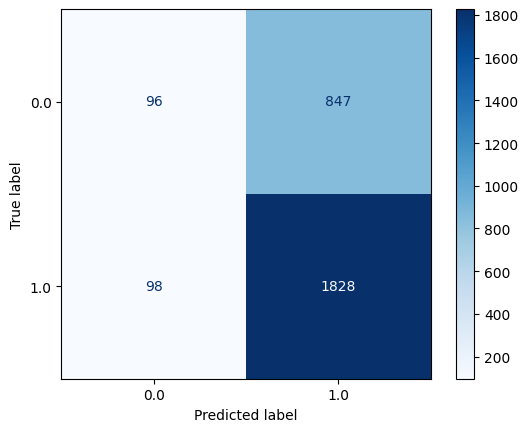


ROC Curve :



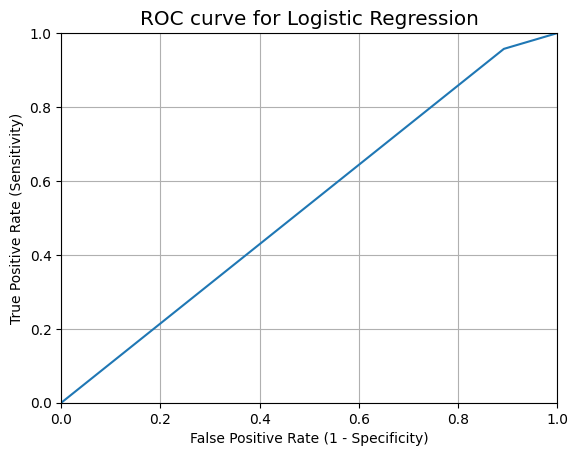


------------END------------




****  Support Vector Machine  ****

Training :

Accuracy score    :    68.45590798187521
Precision score   :    0.6865180854950675
ROC AUC score     :    0.5726680387486525
AUC score         :    0.5328674751599202

**********************************************


Testing :

Accuracy score    :    71.19116792562463
Precision score   :    0.7032530419667246
ROC AUC score     :    0.6679740114859276
AUC score         :    0.5732606976931848

Confusion Matrix :



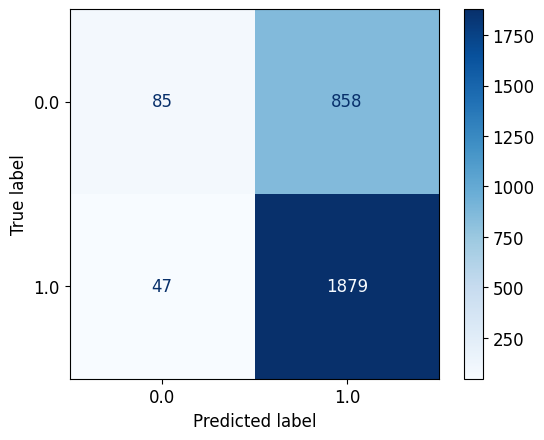


ROC Curve :



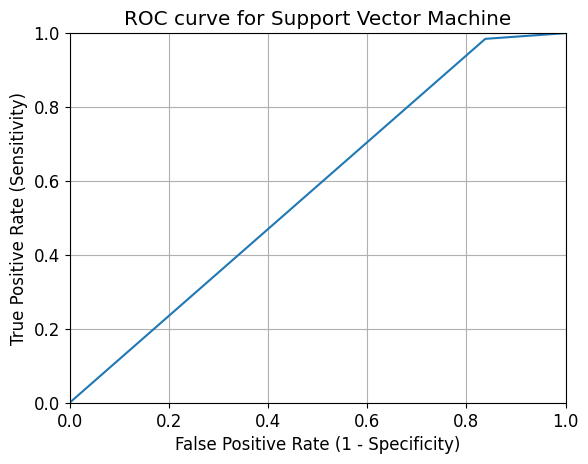


------------END------------




****  Random Forest Classifier  ****


Training :

Accuracy score    :    67.75880097594981
Precision score   :    0.7027136492507088
ROC AUC score     :    0.659576658749115
AUC score         :    0.5612319115877058

**********************************************


Testing :

Accuracy score    :    77.42010459035444
Precision score   :    0.7647304057809894
ROC AUC score     :    0.8257187420234922
AUC score         :    0.681462949143675

Confusion Matrix :



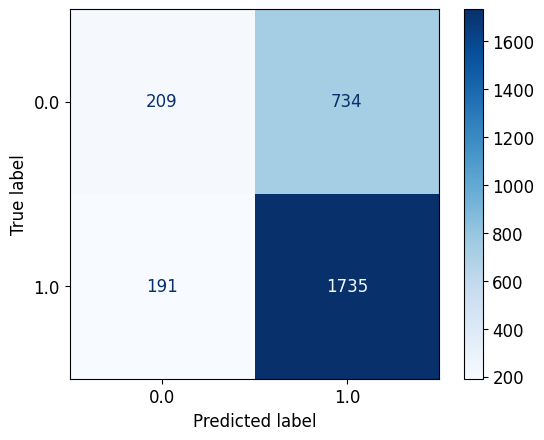


ROC Curve :



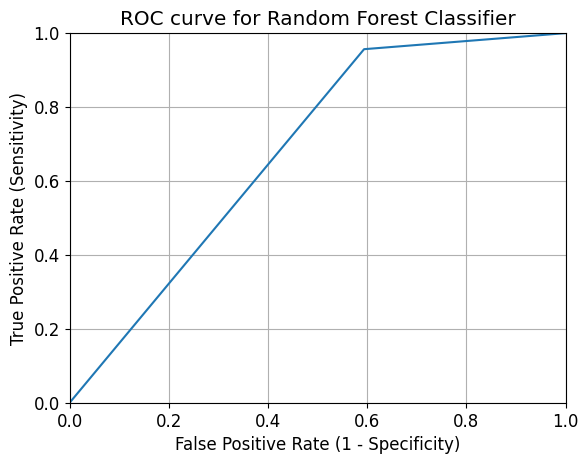


------------END------------




****  AdaBoost Classifier  ****

Training :

Accuracy score    :    67.27082607180202
Precision score   :    0.6823051348356114
ROC AUC score     :    0.6328659334947677
AUC score         :    0.5234996569795036

**********************************************


Testing :

Accuracy score    :    67.4259151656014
Precision score   :    0.6816502463054187
ROC AUC score     :    0.6517577937872039
AUC score         :    0.5278626201245329

Confusion Matrix :



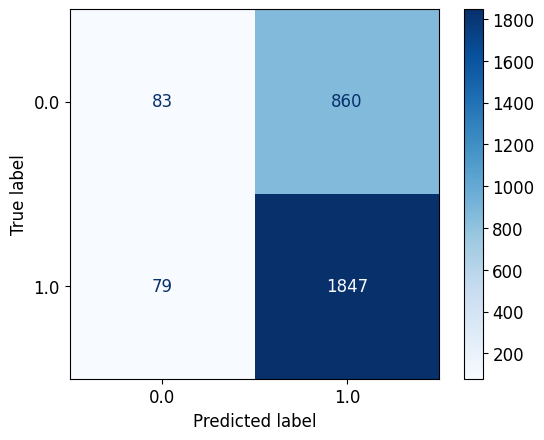


ROC Curve :



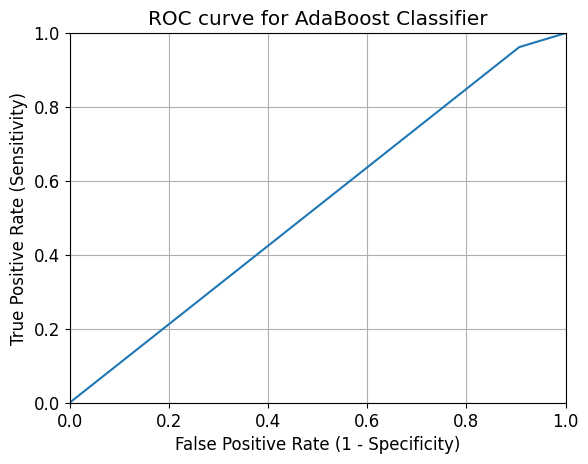


------------END------------




****  Multinomial Naive Bayes  ****

Training :

Accuracy score    :    66.71314046706169
Precision score   :    0.6755877034358047
ROC AUC score     :    0.6085904885867225
AUC score         :    0.5093331307144847

**********************************************


Testing :

Accuracy score    :    67.64671702498546
Precision score   :    0.6805302201143135
ROC AUC score     :    0.6205255371366705
AUC score         :    0.5258009480510077

Confusion Matrix :



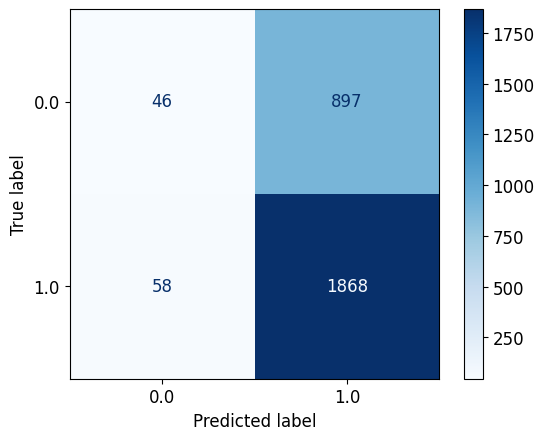


ROC Curve :



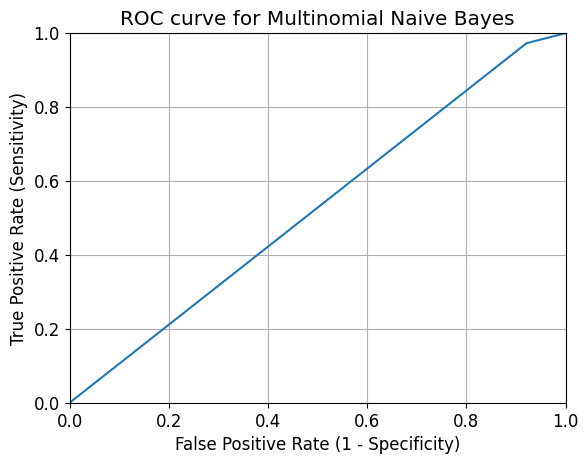


------------END------------




****  KNN Classifier  ****

Training :

Accuracy score    :    65.24921575461833
Precision score   :    0.7373530914665304
ROC AUC score     :    0.6471037617730911
AUC score         :    0.602076127425232

**********************************************


Testing :

Accuracy score    :    69.64555490993608
Precision score   :    0.7642604745078243
ROC AUC score     :    0.7122432493907075
AUC score         :    0.6491334541232101

Confusion Matrix :



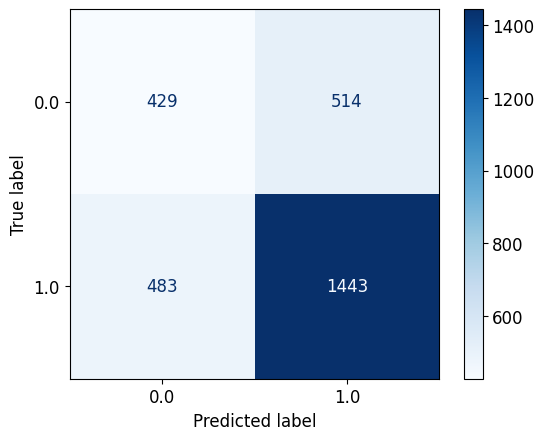


ROC Curve :



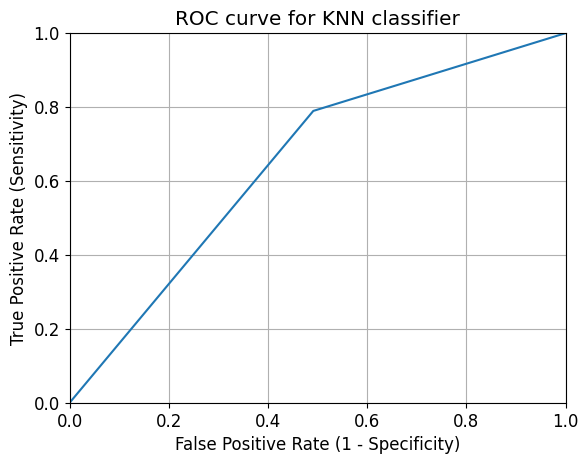


------------END------------




Select the Machine Learning Model you wanted to Train :

 1. Logistic Regression Model
 2. Support Vector Machine Model
 3. Random Forest Classifier
 4. Adaboost Classifier
 5. Multinomial Naive Bayes
 6. KNN Classifier
 7. All Models Together
 8. Go Back


Going Back To Main Menu!




1. Train Using Maching Learning Models
2. Evaluate the model with new dataset
3. Observations
4. Exit



Accuracy :



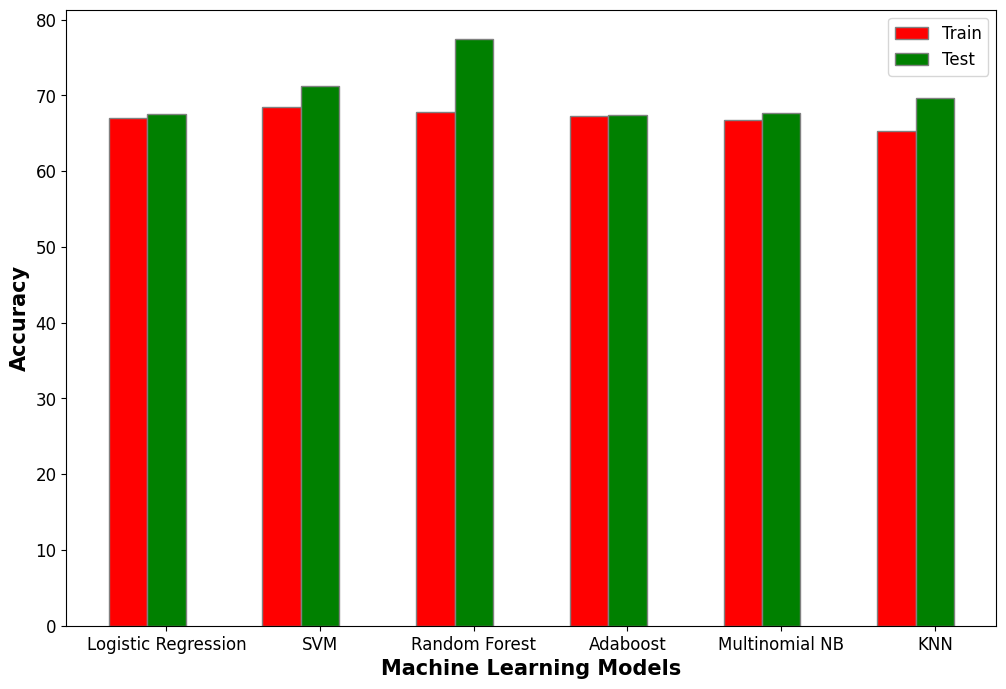




Precision :



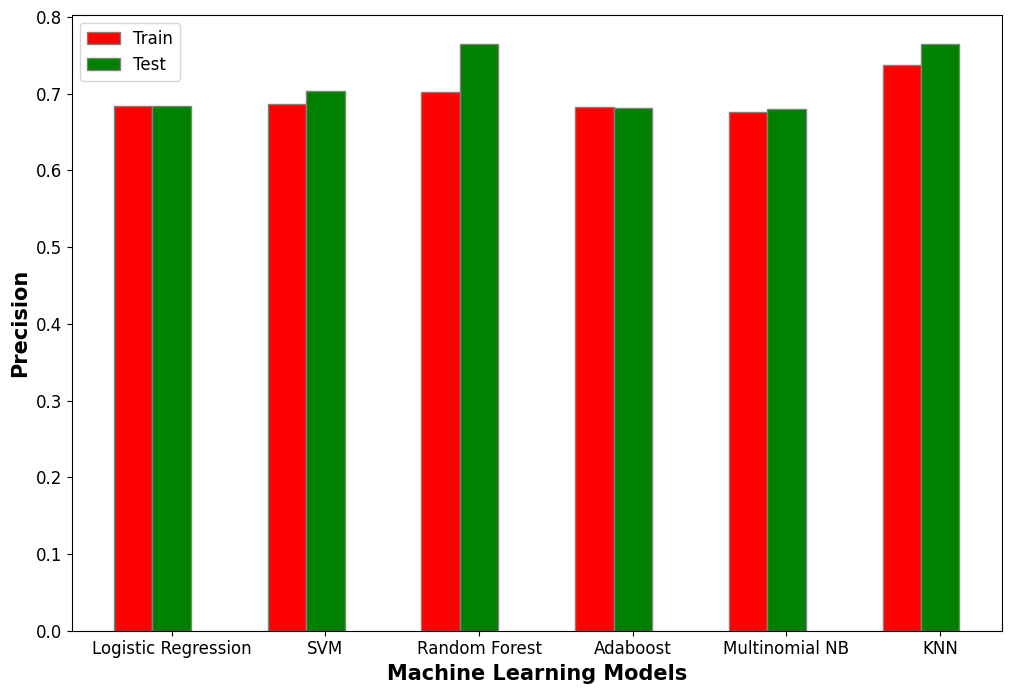




1. Train Using Maching Learning Models
2. Evaluate the model with new dataset
3. Observations
4. Exit




In [ ]:
if __name__ == "__main__":
  main() #running the CLI